In [265]:
import pickle
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


def warn(*args, **kwargs):
    pass


warnings.warn = warn
warnings.filterwarnings('ignore')

In [266]:
# Plots to represent the predictions vs real values. (Visualisation of ML models)
def two_d_compare(X_test, y_test, y_pred, model_name):
    plt.subplots(ncols=2, figsize=(10, 4))
    plt.suptitle('Actual vs Predicted data : ' + model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred, alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()

# Plots to visualise simple linear regression model.
def two_vs_three(x_test, y_test, y_pred, z=None, isLinear=False):
    area = 60

    fig = plt.figure(figsize=(6, 6))
    fig.suptitle('view of sales price data')

    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x_test, y_test, alpha=0.5, color='blue', s=area)
    ax.scatter(x_test, y_pred, alpha=0.5, color='red', s=area)
    #     ax.plot(x_test, y_pred, alpha=0.9,color='red', linewidth=2)
    ax.set_xlabel('LivingArea')
    ax.set_ylabel('Price')

    plt.title('LivingArea vs Price')

    plt.show()

In [267]:
df_pd = pd.read_csv("data/cleaned_data.csv")
df_pd.head()

,BathroomCount,BedroomCount,ConstructionYear,District,FloodingZone,Garden,GardenArea,Kitchen,LivingArea,NumberOfFacades,...,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,1,1,1969,Brugge,False,0,0,False,29,0,...,Flanders,1,0,GOOD,flat_studio,0,1,1,2,residential_sale
1,0,2,1972,Hasselt,NON_FLOOD_ZONE,0,0,False,92,0,...,Flanders,1,0,AS_NEW,apartment,0,1,1,2,residential_sale
2,1,0,1974,Namur,NON_FLOOD_ZONE,0,0,SEMI_EQUIPPED,29,2,...,Wallonie,0,1,GOOD,flat_studio,0,1,1,2,residential_sale
3,1,0,1974,Namur,NON_FLOOD_ZONE,0,0,NOT_INSTALLED,29,2,...,Wallonie,0,0,GOOD,flat_studio,0,1,0,2,residential_sale
4,2,0,1950,Brussels,NON_FLOOD_ZONE,1,100,SEMI_EQUIPPED,200,2,...,Brussels,0,0,GOOD,apartment_block,178,0,3,1,residential_sale


In [268]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48575 entries, 0 to 48574
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BathroomCount      48575 non-null  int64 
 1   BedroomCount       48575 non-null  int64 
 2   ConstructionYear   48575 non-null  int64 
 3   District           48575 non-null  object
 4   FloodingZone       48575 non-null  object
 5   Garden             48575 non-null  int64 
 6   GardenArea         48575 non-null  int64 
 7   Kitchen            48575 non-null  object
 8   LivingArea         48575 non-null  int64 
 9   NumberOfFacades    48575 non-null  int64 
 10  PEB                48575 non-null  object
 11  PostalCode         48575 non-null  int64 
 12  Price              48575 non-null  int64 
 13  Province           48575 non-null  object
 14  Region             48575 non-null  object
 15  RoomCount          48575 non-null  int64 
 16  ShowerCount        48575 non-null  int64

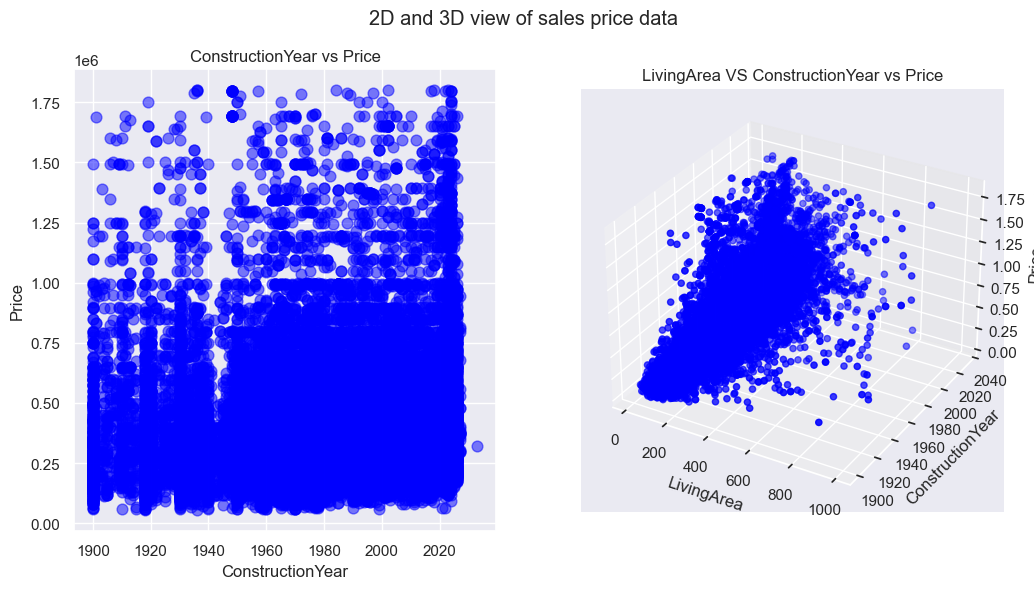

In [269]:
# 3 d visualisation of ConstructionYear and LivingArea in conjuction with Price.
area = 60
x = df_pd['ConstructionYear']
y = df_pd['Price']
z = df_pd['LivingArea']

fig = plt.figure(figsize=(12, 6))
fig.suptitle('2D and 3D view of sales price data')

# First plot
ax = fig.add_subplot(1, 2, 1)

ax.scatter(x, y, alpha=0.5, color='blue', s=area)
ax.set_xlabel('ConstructionYear')
ax.set_ylabel('Price')

plt.title('ConstructionYear vs Price')

# Second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(z, x, y, color='blue', marker='o')

ax.set_ylabel('ConstructionYear')
ax.set_zlabel('Price')
ax.set_xlabel('LivingArea')

plt.title('LivingArea VS ConstructionYear vs Price')

plt.show()

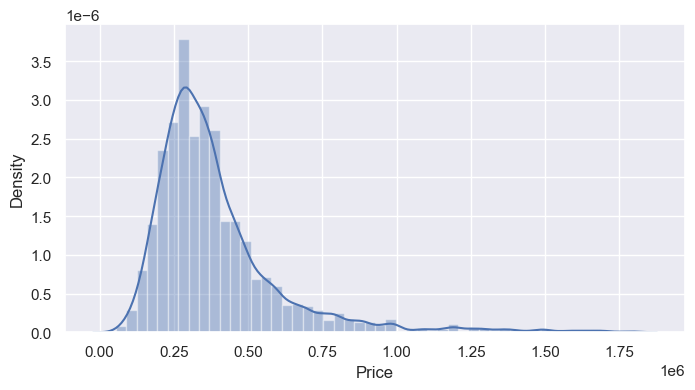

In [270]:
# Visualization of the price distribution.
sns.set(rc={"figure.figsize": (8, 4)})
np.random.seed(0)
ax = sns.distplot(df_pd['Price'])
plt.show()

In [271]:
print("Checking of datatypes : \n" + str(df_pd.dtypes))

Checking of datatypes : 
BathroomCount         int64
BedroomCount          int64
ConstructionYear      int64
District             object
FloodingZone         object
Garden                int64
GardenArea            int64
Kitchen              object
LivingArea            int64
NumberOfFacades       int64
PEB                  object
PostalCode            int64
Price                 int64
Province             object
Region               object
RoomCount             int64
ShowerCount           int64
StateOfBuilding      object
SubtypeOfProperty    object
SurfaceOfPlot         int64
Terrace               int64
ToiletCount           int64
TypeOfProperty        int64
TypeOfSale           object
dtype: object


In [272]:
print("Checking of counts : \n" + str(df_pd.count()))

Checking of counts : 
BathroomCount        48575
BedroomCount         48575
ConstructionYear     48575
District             48575
FloodingZone         48575
Garden               48575
GardenArea           48575
Kitchen              48575
LivingArea           48575
NumberOfFacades      48575
PEB                  48575
PostalCode           48575
Price                48575
Province             48575
Region               48575
RoomCount            48575
ShowerCount          48575
StateOfBuilding      48575
SubtypeOfProperty    48575
SurfaceOfPlot        48575
Terrace              48575
ToiletCount          48575
TypeOfProperty       48575
TypeOfSale           48575
dtype: int64


In [273]:
# Checking missing values
df_pd.isnull().any()

BathroomCount        False
BedroomCount         False
ConstructionYear     False
District             False
FloodingZone         False
Garden               False
GardenArea           False
Kitchen              False
LivingArea           False
NumberOfFacades      False
PEB                  False
PostalCode           False
Price                False
Province             False
Region               False
RoomCount            False
ShowerCount          False
StateOfBuilding      False
SubtypeOfProperty    False
SurfaceOfPlot        False
Terrace              False
ToiletCount          False
TypeOfProperty       False
TypeOfSale           False
dtype: bool

In [274]:
# Identifies categorical columns in a dataset.
categoricalColumns = df_pd.select_dtypes(include=['object']).columns

print("Categorical columns: ")
print(categoricalColumns)

# Creates the imputer object that replaces missing values with most frequent in each column.
impute_categorical = SimpleImputer(strategy='most_frequent')

# Creates encoder that converts categorical values into binary columns.
onehot_categorical = OneHotEncoder(handle_unknown='ignore')

# Creates the pipeline that combines encoder and imputer.
categorical_transformer = Pipeline(steps=[('impute', impute_categorical),
                                          ('onehot', onehot_categorical)])

Categorical columns: 
Index(['District', 'FloodingZone', 'Kitchen', 'PEB', 'Province', 'Region',
       'StateOfBuilding', 'SubtypeOfProperty', 'TypeOfSale'],
      dtype='object')


In [275]:
# Identifies all numerical values, excluding column 'Price'
numericalColumns = [col for col in df_pd.select_dtypes(include=['float', 'int']).columns if col not in ['Price']]
print("Numerical columns: ")
print(numericalColumns)

# Creates scaler object that standardizes features by removing the mean and scaling to unit variance, this ensures that each feature contributes equally to the model.
scaler_numerical = StandardScaler()

# Creates the pipeline that implements the scaler.
numerical_transformer = Pipeline(steps=[('scale', scaler_numerical)])

Numerical columns: 
['BathroomCount', 'BedroomCount', 'ConstructionYear', 'Garden', 'GardenArea', 'LivingArea', 'NumberOfFacades', 'PostalCode', 'RoomCount', 'ShowerCount', 'SurfaceOfPlot', 'Terrace', 'ToiletCount', 'TypeOfProperty']


In [276]:
# Creates a column transformer that applies transformations only to categorical columns, passing through other columns unchanged.
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],remainder="passthrough")

# Creates a column transformer that applies different transformations to categorical and numerical columns.
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),('num', numerical_transformer, numericalColumns)],remainder="passthrough")

# By using the transformers, we want to ensure that categorical and numerical data are appropriately preprocessed according to their specific requirements. It makes data ready for futher analysis.

In [277]:
# Application of transformers on our dataset.
df_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp)

df_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp_2)

Data after transforming :
  (0, 5)	1.0
  (0, 45)	1.0
  (0, 53)	1.0
  (0, 72)	1.0
  (0, 84)	1.0
  (0, 86)	1.0
  (0, 90)	1.0
  (0, 103)	1.0
  (0, 121)	1.0
  (0, 122)	1.0
  (0, 123)	1.0
  (0, 124)	1969.0
  (0, 127)	29.0
  (0, 129)	8380.0
  (0, 130)	99000.0
  (0, 131)	1.0
  (0, 134)	1.0
  (0, 135)	1.0
  (0, 136)	2.0
  (1, 14)	1.0
  (1, 46)	1.0
  (1, 53)	1.0
  (1, 66)	1.0
  (1, 79)	1.0
  (1, 86)	1.0
  :	:
  (48573, 129)	3830.0
  (48573, 130)	219000.0
  (48573, 134)	1.0
  (48573, 135)	1.0
  (48573, 136)	2.0
  (48574, 12)	1.0
  (48574, 45)	1.0
  (48574, 53)	1.0
  (48574, 72)	1.0
  (48574, 76)	1.0
  (48574, 86)	1.0
  (48574, 90)	1.0
  (48574, 105)	1.0
  (48574, 121)	1.0
  (48574, 122)	1.0
  (48574, 123)	3.0
  (48574, 124)	2024.0
  (48574, 125)	1.0
  (48574, 126)	168.0
  (48574, 127)	129.0
  (48574, 129)	9880.0
  (48574, 130)	409000.0
  (48574, 131)	4.0
  (48574, 133)	234.0
  (48574, 136)	1.0
Data after transforming :
  (0, 5)	1.0
  (0, 45)	1.0
  (0, 53)	1.0
  (0, 72)	1.0
  (0, 84)	1.0
  (0, 86

In [278]:
# Separates features and target
features = []
features = df_pd.drop(['Price'], axis=1)

# Extraction of the 'Price' column and its normalization using natural log.
label = pd.DataFrame(df_pd, columns=['Price'])
label = np.log(df_pd['Price'])

print("value of label: \n" + str(label))

# Extraction of the "LivingArea" feature and reshaping it for simple linear regression model.
X = features['LivingArea'].values.reshape(-1, 1)

# Splitting of the dataset.
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X, label, test_size=0.2,random_state=0)

print("Dimensions of datasets that will be used for training:"
      + str(X_train_slr.shape)
      + ". Output label" + str(y_train_slr.shape))
print("Dimensions of datasets that will be used for testing:"
      + str(X_test_slr.shape)
      + ". Output label"
      + str(y_test_slr.shape))

value of label: 
0        11.502875
1        12.196022
2        11.461632
3        11.502875
4        13.422468
           ...    
48570    12.676076
48571    12.449019
48572    13.014778
48573    12.296827
48574    12.921470
Name: Price, Length: 48575, dtype: float64
Dimensions of datasets that will be used for training:(38860, 1). Output label(38860,)
Dimensions of datasets that will be used for testing:(9715, 1). Output label(9715,)


In [279]:
from sklearn.linear_model import LinearRegression

model_name = 'Simple Linear Regression'

slRegressor = LinearRegression()

slRegressor.fit(X_train_slr, y_train_slr)

y_pred_slr = slRegressor.predict(X_test_slr)

print(slRegressor)

LinearRegression()


In [280]:
print('Intercept: \n', slRegressor.intercept_)
print('Coefficients: \n', slRegressor.coef_)

Intercept: 
 12.326926495728145
Coefficients: 
 [0.00306936]


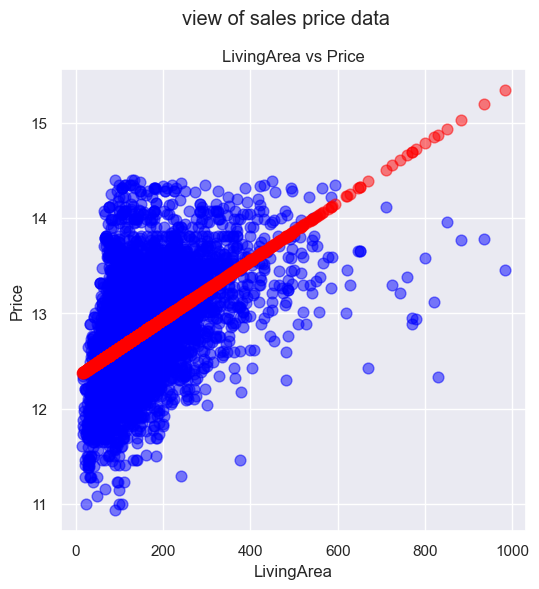

In [281]:
two_vs_three(X_test_slr[:, 0], y_test_slr, y_pred_slr, None, True)


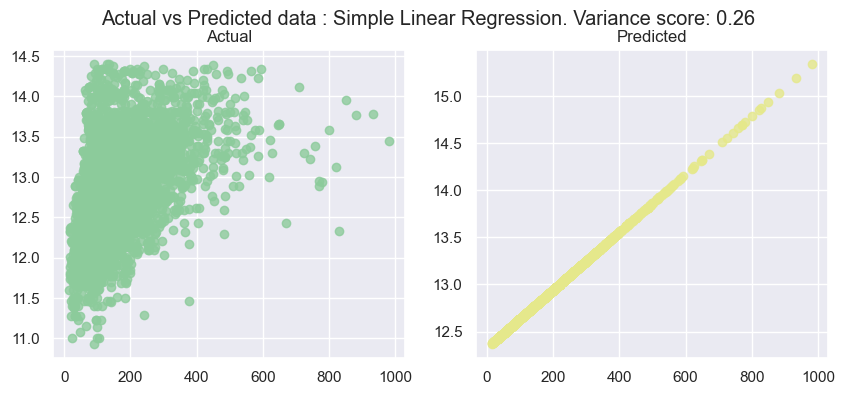

In [282]:
two_d_compare(X_test_slr, y_test_slr, y_pred_slr, model_name)


In [283]:
mse_1 = mean_squared_error(np.exp(y_test_slr), np.exp(y_pred_slr))

r2_1 = r2_score(y_test_slr, y_pred_slr)

w1 = math.sqrt(mse_1)

print(f'MSE score: {round(w1,2)}, R2 score: {round(r2_1,2)} %')

MSE score: 212706.97, R2 score: 0.26 %


In [284]:
mae_1 = mean_absolute_error(np.exp(y_test_slr), np.exp(y_pred_slr))
mae_1

118875.98125297521



**Multiple Linear Regression Model:**




In [285]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

print("Dimensions of datasets that will be used for training : Input features" + str(X_train.shape) +
      ". Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features" + str(X_test.shape) +
      ". Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(38860, 23). Output label(38860,)
Dimensions of datasets that will be used for testing : Input features(9715, 23). Output label(9715,)


In [286]:
from sklearn.linear_model import LinearRegression

model_name = 'Multiple Linear Regression'

mlRegressor = LinearRegression()

mlr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', mlRegressor)])

mlr_model.fit(X_train, y_train)

y_pred_mlr = mlr_model.predict(X_test)

print(mlRegressor)

LinearRegression()


In [287]:
print('Intercept: \n', mlRegressor.intercept_)
print('Coefficients: \n', mlRegressor.coef_)

Intercept: 
 12.656971016896543
Coefficients: 
 [-1.90043257e-02  2.01207514e-02  1.89308453e-01  9.08633841e-02
  2.89643153e-02  4.53264466e-01  1.90104039e-02 -1.74518068e-01
  3.35910638e-02 -1.36093584e-01  2.32873717e-03  3.08113366e-02
  1.92139315e-01 -5.77624816e-02 -1.97642353e-02 -3.56177474e-02
 -1.17700728e-01 -6.84218923e-02  4.22882028e-03 -2.58542415e-02
 -6.82168029e-02 -8.03122574e-02 -7.78054246e-03  1.58784549e-02
  6.89404910e-02  1.06899772e-01 -9.27403891e-02 -1.81340749e-02
  3.50426462e-02 -6.44432506e-02 -1.84095301e-01 -1.24856723e-01
  3.51331195e-02  1.64916701e-03 -1.41370480e-01 -8.01452235e-02
 -7.29139019e-02  1.12399055e-01 -1.26279249e-01  1.24915610e-02
  2.35068497e-01  2.67932690e-02  1.09842109e-03 -6.88382512e-02
  7.71642134e-02 -7.97757298e-03 -1.72318378e-02 -3.60185430e-02
 -1.44400243e-02  3.05368733e-01 -3.08258160e-02  8.20964879e-02
 -2.89297389e-01  6.88456103e-05  6.97250413e-02 -6.01680477e-03
 -5.72183507e-02 -5.63258201e-02  5.219697

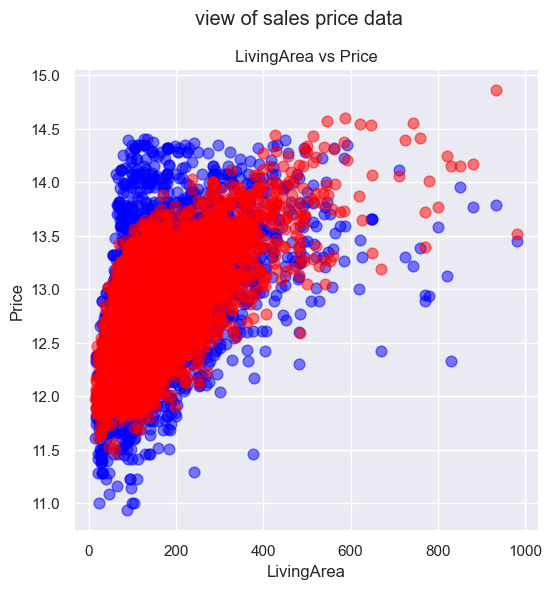

In [288]:
two_vs_three(X_test['LivingArea'], y_test, y_pred_mlr)

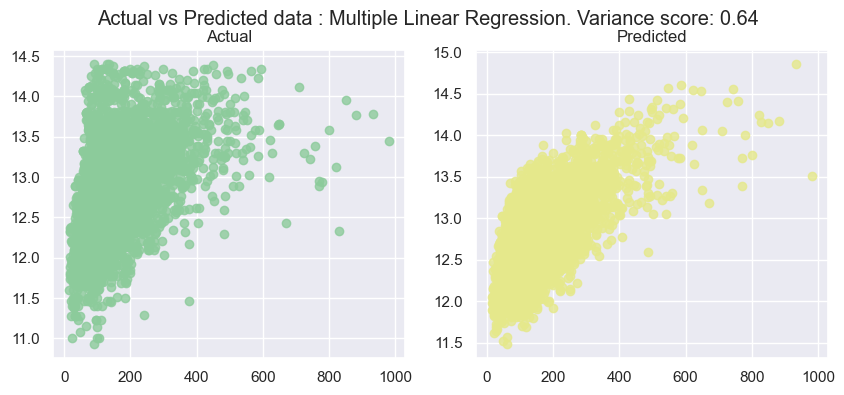

In [289]:
two_d_compare(X_test['LivingArea'], y_test, y_pred_mlr, model_name)

In [290]:
mse_2 = mean_squared_error(np.exp(y_test), np.exp(y_pred_mlr))

r2_2 = r2_score(y_test, y_pred_mlr)

w2 = math.sqrt(mse_2)

print(f'MSE score: {round(w2,2)}, R2 score: {round(r2_2,2)} %')

MSE score: 155057.42, R2 score: 0.64 %


In [291]:
mae_2 = mean_absolute_error(np.exp(y_test), np.exp(y_pred_mlr))
mae_2

87741.28877155844

**Decision Tree**

In [292]:
X_train, X_test, y_train, y_test = train_test_split(features, np.log(df_pd['Price']),test_size=0.2, random_state=0)

print("Dimensions of datasets that will be used for training : Input features" + str(X_train.shape) +
      ". Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features" + str(X_test.shape) +
      ". Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(38860, 23). Output label(38860,)
Dimensions of datasets that will be used for testing : Input features(9715, 23). Output label(9715,)


In [293]:
from sklearn.tree import DecisionTreeRegressor

model_name = "Decision Tree Regressor"

decisionTreeRegressor = DecisionTreeRegressor(random_state=0, max_features=30)

dtr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', decisionTreeRegressor)])

dtr_model.fit(X_train, y_train)

y_pred_dtr = dtr_model.predict(X_test)

print(decisionTreeRegressor)

DecisionTreeRegressor(max_features=30, random_state=0)


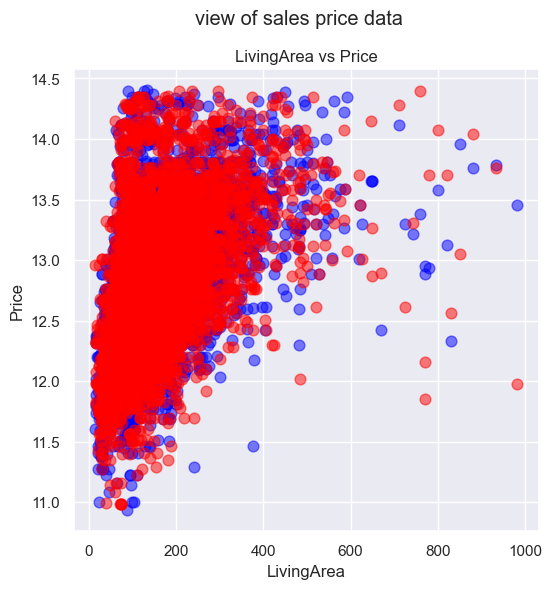

In [294]:
two_vs_three(X_test['LivingArea'], y_test, y_pred_dtr)

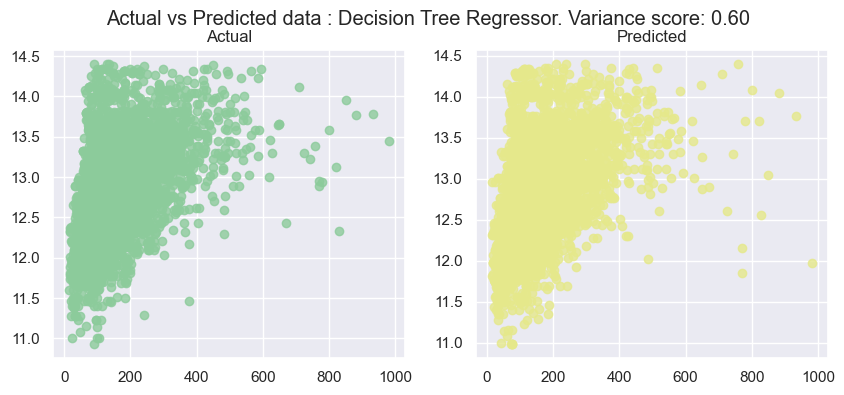

In [295]:
two_d_compare(X_test['LivingArea'], y_test, y_pred_dtr, model_name)

In [296]:
mse_3 = mean_squared_error(np.exp(y_test), np.exp(y_pred_dtr))

r2_3 = r2_score(y_test, y_pred_dtr)

w3 = math.sqrt(mse_3)

print(f'MSE score: {round(w3,2)}, R2 score: {round(r2_3,2)} %')

MSE score: 149397.66, R2 score: 0.6 %


In [297]:
mae_3 = mean_absolute_error(np.exp(y_test), np.exp(y_pred_dtr))
print(mae_3)

77752.99151672151


**Random forest regressor**

In [298]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Random Forest Regressor"

randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=30, random_state=0)

rfr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', randomForestRegressor)])

rfr_model.fit(X_train, y_train)

y_pred_rfr = rfr_model.predict(X_test)

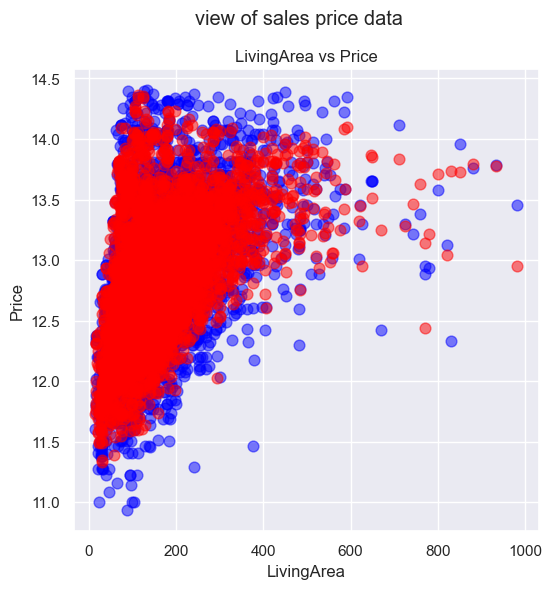

In [299]:
two_vs_three(X_test['LivingArea'], y_test, y_pred_rfr)

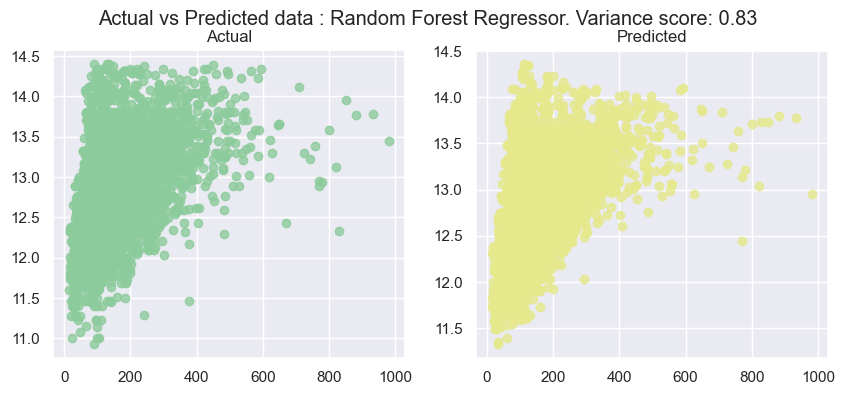

In [300]:
two_d_compare(X_test['LivingArea'], y_test, y_pred_rfr, model_name)

In [301]:
mse_4 = mean_squared_error(np.exp(y_test), np.exp(y_pred_rfr))

r2_4 = r2_score(y_test, y_pred_rfr)

w4 = math.sqrt(mse_4)
print(f'MSE score: {round(w4,2)}, R2 score: {round(r2_4,2)} %')


MSE score: 98140.2, R2 score: 0.83 %


In [302]:
mae_4 = mean_absolute_error(np.exp(y_test), np.exp(y_pred_rfr))
mae_4

52174.78353465063

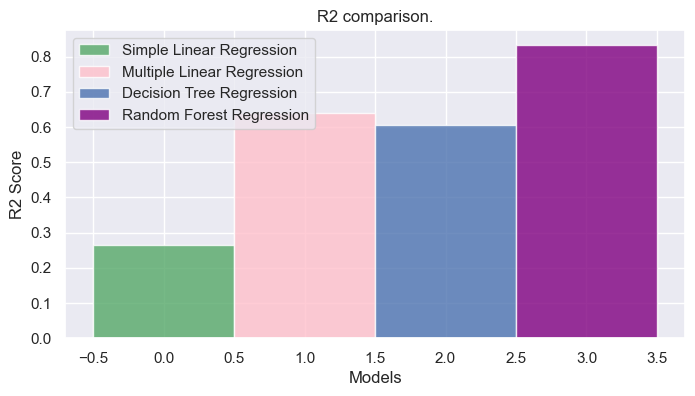

In [303]:
# Visualisation of scores for different models 
opacity = 0.8
bar_width = 1
n_groups = 1
index = np.arange(n_groups)

rects1 = plt.bar(index, r2_1, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, r2_2, bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

rects4 = plt.bar(index + bar_width * 2, r2_3, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')

rects6 = plt.bar(index + bar_width * 3, r2_4, bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 comparison.')
ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Decision Tree', 'Random Forest'))


plt.legend()
plt.show()

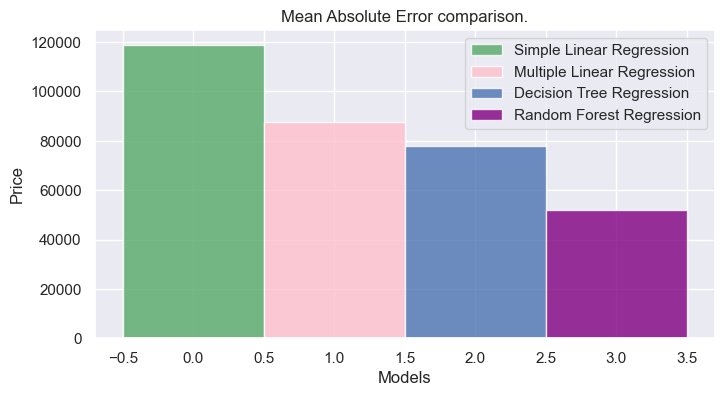

In [304]:
opacity = 0.8
bar_width = 1
n_groups = 1
index = np.arange(n_groups)

rects1 = plt.bar(index, mae_1, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mae_2, bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

rects4 = plt.bar(index + bar_width * 2, mae_3, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')

rects6 = plt.bar(index + bar_width * 3, mae_4, bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('Price')
plt.title('Mean Absolute Error comparison.')
ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Decision Tree', 'Random Forest'))


plt.legend()
plt.show()

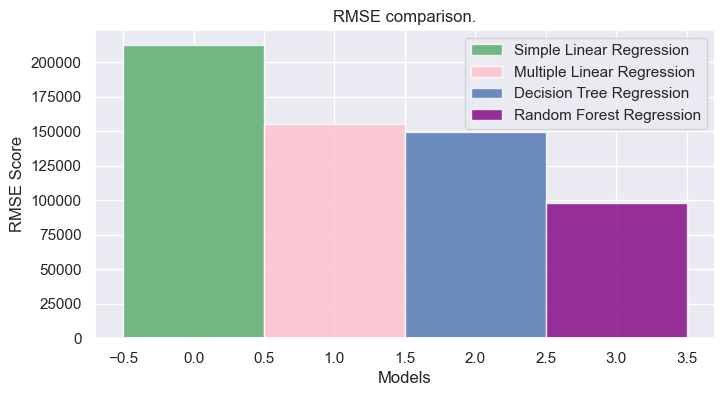

In [305]:
opacity = 0.8
bar_width = 1
n_groups = 1
index = np.arange(n_groups)

rects1 = plt.bar(index, w1, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, w2, bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

rects4 = plt.bar(index + bar_width * 2, w3, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')

rects6 = plt.bar(index + bar_width * 3, w4, bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('RMSE comparison.')
ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Decision Tree', 'Random Forest'))


plt.legend()
plt.show()

In [306]:
# 
# with open('model.pkl', 'wb') as file:
#     pickle.dump(rfr_model, file)
# 
#
# with open('model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)
# 
# 
# score = loaded_model.score(X_test, y_test)
# 
# print(f"Model Score: {score}")